# Logistic Regression

In [2]:
import numpy as np
from sklearn import linear_model
import mglearn
import warnings
import matplotlib.pyplot as plt

# warning off
warnings.filterwarnings(action='ignore')

## Training Data Set

In [5]:
x, y = mglearn.datasets.make_forge() # tuple
print(x) # x축 좌표, y축 좌표
print(y) # 점의 형태

[[ 9.96346605  4.59676542]
 [11.0329545  -0.16816717]
 [11.54155807  5.21116083]
 [ 8.69289001  1.54322016]
 [ 8.1062269   4.28695977]
 [ 8.30988863  4.80623966]
 [11.93027136  4.64866327]
 [ 9.67284681 -0.20283165]
 [ 8.34810316  5.13415623]
 [ 8.67494727  4.47573059]
 [ 9.17748385  5.09283177]
 [10.24028948  2.45544401]
 [ 8.68937095  1.48709629]
 [ 8.92229526 -0.63993225]
 [ 9.49123469  4.33224792]
 [ 9.25694192  5.13284858]
 [ 7.99815287  4.8525051 ]
 [ 8.18378052  1.29564214]
 [ 8.7337095   2.49162431]
 [ 9.32298256  5.09840649]
 [10.06393839  0.99078055]
 [ 9.50048972 -0.26430318]
 [ 8.34468785  1.63824349]
 [ 9.50169345  1.93824624]
 [ 9.15072323  5.49832246]
 [11.563957    1.3389402 ]]
[1 0 1 0 0 1 1 0 1 1 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 0]


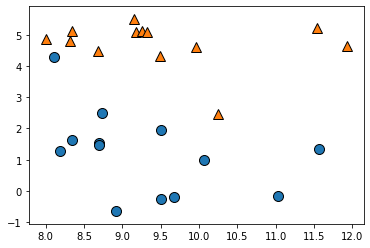

In [16]:
mglearn.discrete_scatter(x[:,0], x[:,1], y)

## Linear Regression
Training Data Set을 가장 잘 표현하는 직선을 그려라.

[[-0.17382295]]
[4.5982984]


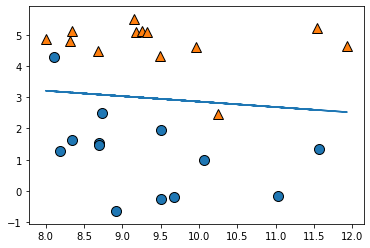

In [18]:
# model
model = linear_model.LinearRegression()

# learning
model.fit(x[:,0].reshape(-1,1), x[:,1].reshape(-1,1))

# 결과
print(model.coef_) # Weight: [[-0.17382295]]
print(model.intercept_) # bias: [4.5982984]

# Visualization
mglearn.discrete_scatter(x[:,0], x[:,1], y)
plt.plot(x[:,0], x[:,0] * model.coef_.ravel() + model.intercept_) # (x, y) 그래프
plt.show()

### 그러면 Linear Regression 직선으로는 분류 작업을 할 수 없을까?
공부시간에 따른 합격 여부를 판단해보자.

* <b>지대점이 존재하지 않을 경우 -> 예측 가능</b>

기울기: [[0.1292517]], 절편: [-0.27210884]


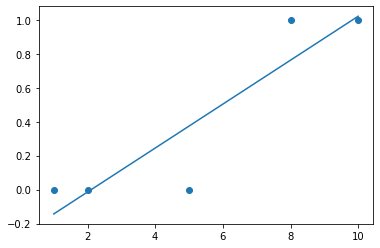

[[0.63265306]]
[5.97368421]


In [24]:
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

# Training Data Set
x_data = np.array([1, 2, 5, 8, 10]) # 공부시간
t_data = np.array([0, 0, 0, 1, 1])  # 합격여부 (0: Fail, 1: Pass)

# sklearn
model = linear_model.LinearRegression()
model.fit(x_data.reshape(-1,1), t_data.reshape(-1,1))
print('기울기: {}, 절편: {}'.format(model.coef_, model.intercept_))

# visualization
plt.scatter(x_data, t_data)
plt.plot(x_data, x_data * model.coef_.ravel() + model.intercept_)
plt.show()

# prediction
result = model.predict([[7]])
print(result) # [[0.63265306]] => 0.5보다 크기 때문에 시험에 합격으로 간주

# 그럼 시험에 통과하기 위한 최소 시간?
time = (0.5 - model.intercept_) / model.coef_.ravel()
print(time) # [5.97368421]

* <b>실제 데이터가 지대점처럼 보이는 경우 -> 예측 불가</b> <br>
<br>
따라서 데이터에 따라 예측결과가 달라지므로 Linear Regression으로는 문제 해결이 안된다.

기울기: [[0.03500583]], 절편: [0.17327888]


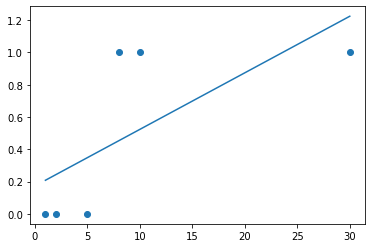

[[0.41831972]]
[9.33333333]


In [25]:
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

# Training Data Set
x_data = np.array([1, 2, 5, 8, 10, 30]) # 공부시간
t_data = np.array([0, 0, 0, 1, 1, 1])  # 합격여부 (0: Fail, 1: Pass)

# sklearn
model = linear_model.LinearRegression()
model.fit(x_data.reshape(-1,1), t_data.reshape(-1,1))
print('기울기: {}, 절편: {}'.format(model.coef_, model.intercept_))

# visualization
plt.scatter(x_data, t_data)
plt.plot(x_data, x_data * model.coef_.ravel() + model.intercept_)
plt.show()

# prediction
result = model.predict([[7]])
print(result) # [[0.41831972]] => 0.5보다 작기 때문에 시험에 불합격으로 간주

# 그럼 시험에 통과하기 위한 최소 시간?
time = (0.5 - model.intercept_) / model.coef_.ravel()
print(time) # [9.33333333]

## Logistic Regression
시그모이드 함수의 형태를 살펴보자.

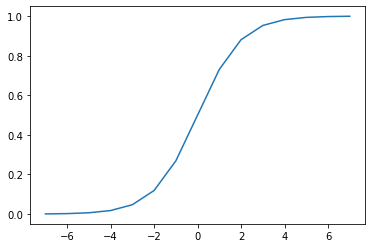

In [26]:
import numpy as np
import matplotlib.pyplot as plt

x_data = np.arange(-7, 8)
sigmoid_t_data = 1 / (1 + np.exp(-1 * x_data))

plt.plot(x_data, sigmoid_t_data)
plt.show()

### 그럼, 공부 시간에 따른 시험 함격 여부에 대한 데이터로 학습 후 예측을 해보자.
* 독립변수: 공부시간 (1개)
* Simple Logistic Regression

### Training Data Set

In [39]:
x_data = np.arange(2,21, 2).reshape(-1,1) # 공부시간(독립변수): 2 ~ 20 짝수
t_data = np.array([0,0,0,0,0,0,1,1,1,1]).reshape(-1,1)  # 합격여부(14시간부터 합격)

### Python

In [34]:
import numpy as np

# 수치미분함수
def numerical_derivative(f, x):
    # f: 손실함수, x: ndarray => [W, b]
    
    delta_x = 1e-4
    derivative_x = np.zeros_like(x) 
    
    it = np.nditer(x, flags=['multi_index'])
    
    while not it.finished: 
        idx = it.multi_index 
        tmp = x[idx]                        

        x[idx] = tmp + delta_x 
        fx_plus_delta = f(x) 
        
        x[idx] = tmp - delta_x
        fx_minus_delta = f(x) 
        
        derivative_x[idx] = (fx_plus_delta - fx_minus_delta) / (2 * delta_x)
        
        x[idx] = tmp 
    
        it.iternext() 
        
    return derivative_x



# W, b
W = np.random.rand(1,1) # 행렬곱 연산을 위해 2차원 배열로 생성
b = np.random.rand(1)   # braodcasting
    
# loss function
def loss_func(input_obj): #[W, b]
    input_W = input_obj[0]
    input_b = input_obj[1]
    
    # linear regression hypothesis
    z = np.dot(x_data, input_W) + input_b
    
    # logistic regression hypothesis
    y = 1 / (1 + np.exp(-1 * z))
    
    
    # cross entropy
    # 로그 연산 시, 무한대로 발산하는 경우를 방지하기위해 delta 값 설정
    delta = 1e-7 # 아주 작은 더미값
    
    log_loss = -np.sum(t_data*np.log(y+delta) + (1 - t_data)*np.log(1 - y+delta)) 
    
    return log_loss

# learning rate
learning_rate = 1e-4

# learning - Gradient Descent Algorithm 수행
for step in range(300000):
    # [W b]
    input_param = np.concatenate((W.ravel(), b), axis=0)
    
    # learning_rate * 편미분
    derivative_result = learning_rate * numerical_derivative(loss_func, input_param)
    
    # W, b 갱신
    W = W - derivative_result[0].reshape(-1, 1)
    b = b - derivative_result[1]
    
    if step % 30000 == 0:
        input_param = np.concatenate((W.ravel(), b), axis=0)
        print('W: {}, b: {}, loss: {}'.format(W.ravel(), b, loss_func(input_param)))
    

W: [0.61634402], b: [0.83812458], loss: 31.084563636559768
W: [0.25396711], b: [-2.97342113], loss: 3.0170486947984667
W: [0.37154708], b: [-4.54839051], loss: 2.1656165416188413
W: [0.44953782], b: [-5.59003483], loss: 1.7989241322686622
W: [0.50964056], b: [-6.39073464], loss: 1.5831537572251195
W: [0.55936499], b: [-7.05174161], loss: 1.4363451358839723
W: [0.60223054], b: [-7.62052878], loss: 1.3277292060983215
W: [0.64018536], b: [-8.12337171], loss: 1.242876050539615
W: [0.67442833], b: [-8.57643292], loss: 1.1740104743788582
W: [0.70575359], b: [-8.99041104], loss: 1.1165235026655151


### Python Prediction
13시간 공부할 경우?

In [35]:
def logistic_predict(x): # x = [[13]]
    z = np.dot(x, W) + b
    y = 1 / (1 + np.exp(-1 * z))
    
    if y < 0.5:
        result = 0
    else:
        result = 1
        
    return result, y # (result: 결과값, y: 확률값)

study_hour = np.array([[13]])
print(logistic_predict(study_hour)) # 결과: 1(합격), 확률: 0.54451492

(1, array([[0.54451492]]))


### Tensorflow

In [5]:
import tensorflow as tf

# Training Data Set
x_data = np.arange(2,21, 2).reshape(-1,1)
t_data = np.array([0,0,0,0,0,0,1,1,1,1]).reshape(-1,1)

# placeholder
X = tf.placeholder(shape=[None,1], dtype=tf.float32)
T = tf.placeholder(shape=[None,1], dtype=tf.float32)

# W, b
W = tf.Variable(tf.random.normal([1,1]), name='weight')
b = tf.Variable(tf.random.normal([1]), name='bias')

# model
linear_model = tf.matmul(X, W) + b 
H = tf.sigmoid(linear_model) 

# log loss
loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=linear_model, labels=T))

# gradient descent algorithm
train = tf.train.GradientDescentOptimizer(learning_rate=1e-4).minimize(loss)

# learning
sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(300000):
    _, W_val, b_val, loss_val = sess.run([train, W, b, loss], feed_dict={X: x_data, T: t_data})
    
    if step % 30000 == 0:
        print('W: {}, b: {}, loss: {}'.format(W_val, b_val, loss_val))

W: [[0.4479966]], b: [-0.11997605], loss: 1.8789024353027344
W: [[0.08274794]], b: [-0.6647921], loss: 0.5540010333061218
W: [[0.11516709]], b: [-1.1050949], loss: 0.4889136850833893
W: [[0.14348446]], b: [-1.4878873], loss: 0.43972525000572205
W: [[0.16849104]], b: [-1.8249409], loss: 0.4016006886959076
W: [[0.19081108]], b: [-2.1252987], loss: 0.37132471799850464
W: [[0.210955]], b: [-2.3959947], loss: 0.3467347323894501
W: [[0.22930133]], b: [-2.642423], loss: 0.32636183500289917
W: [[0.2461758]], b: [-2.8688328], loss: 0.309181272983551
W: [[0.26175717]], b: [-3.0778663], loss: 0.29451385140419006


### Tensorflow Prediction
13시간 공부할 경우?

In [6]:
study_hour = np.array([[13]])
result = sess.run(H, feed_dict={X: study_hour})
print(result) # [[0.5790821]] 확률로 합격

[[0.5790821]]


### Scikit-learn

In [37]:
from sklearn import linear_model

model = linear_model.LogisticRegression()
model.fit(x_data, t_data.ravel()) # 2번째 인자 - 1차원
result = model.predict(study_hour)
result_proba = model.predict_proba(study_hour) # [[떨어질 확률, 합격할 확률]]

print('W: {}, b: {}, 확률: {}'.format(model.coef_, model.intercept_, result_proba))
print(result) # 0: 불합격

W: [[0.96460076]], b: [-12.54018553], 확률: [[0.50009391 0.49990609]]
[0]
